#### Bosons in a trap - Bose-Einstein condensation

**A**

In this section, we consider **two quantum particles** at inverse temperature beta, in a harmonic potential $V(x) = x^2 /2$. These particles dont interact with each other, but only with the external potential.

In the Section **A1,** these particles are distinguishable, and the fact that there are two of them makes no real difference: The density distribution is the one of a single particle, that we already studied in Homework session 6.

In Sections A2 and A3, the particles are bosons, i.e. we need to consider different possible permutation structures. For two bosons, there are only two permutations:

- the permutation (0, 1), that is 0 -> 0, 1 -> 1. This permutation has two permutation cycles, each made of one particle

- the permutation (1, 0), that is 0 -> 1, 1 -> 0. This permutation has one permutation cycle. It is made of two particles

Throughout this entire Homework session, we need no Trotter  approximation (because we use the harmonic Lévy construction) and  therefore do not have to break up the path into a large number of  imaginary-time slices. As represented in the figure above, the interval  [0, beta] is divided in a single sub-interval.

NB: Throughout Section A, we use a version of levy_harmonic_path that is modified with respect to the one of week 6:


def levy_harmonic_path(k): <br>
    x = [random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0)))] <br>
    if k == 2: <br>
        Ups1 = 2.0 / math.tanh(beta)<br>
        Ups2 = 2.0 * x[0] / math.sinh(beta) <br>
        x.append(random.gauss(Ups2 / Ups1, 1.0 / math.sqrt(Ups1))) <br>
    return x[:] <br>

Study this function carefully. At a difference with the corresponding function from Week 6, in the new version:

- There are no intermediate slices, since the paths are sampled from the exact distribution. 

- There are only two possible cases: For k=1, we sample a single position (cycle of length 1), while for k=2, we  sample two positions (a cycle of length two).

- The first position of the path is directly sampled  from the known distribution pi(x), as you already did in Section B3 of Homework session 6.

**A1**

Consider **two distinguishable quantum particles** in a one-dimensional harmonic trap  (particles do not interact with each other). Write a simple program  sampling their positions from levy_harmonic_path(k), with k=1.

**For your convenience, the program is shown below**. The two lists ("low" and "high") encode the positions at slice 0 (low, tau = 0) and at slice 1 (high, tau = beta):

 - Modify the program so that it plots a histogram of the positions of particles 0 and 1 (choose beta=2). In the same figure, also show on the same graph the single-particle analytic solution pi(x) given below.


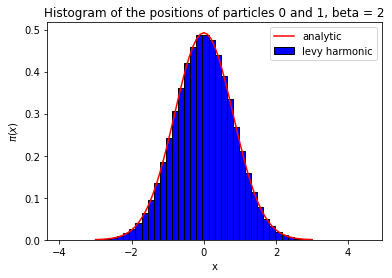

In [1]:
import math, random, pylab

def levy_harmonic_path(k):
    x = [random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0)))]
    if k == 2:
        Ups1 = 2.0 / math.tanh(beta)
        Ups2 = 2.0 * x[0] / math.sinh(beta)
        x.append(random.gauss(Ups2 / Ups1, 1.0 / math.sqrt(Ups1)))
    return x[:]


def pi_x(x, beta):
    sigma = 1.0 / math.sqrt(2.0 * math.tanh(beta / 2.0))
    return math.exp(-x ** 2 / (2.0 * sigma ** 2)) / math.sqrt(2.0 * math.pi) / sigma

beta = 2.0
nsteps = 1000000
low = levy_harmonic_path(2)
high = low[:]
data = []
for step in range(nsteps):
    k = random.choice([0, 1])
    low[k] = levy_harmonic_path(1)[0]
    high[k] = low[k]
    data += low[:]
    
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [pi_x(x, beta) for x in list_x]
pylab.plot(list_x, list_y, label='analytic', color = 'red')
pylab.hist(data, bins=50, density = True, stacked = True,\
           ec='black', label='levy harmonic', color = 'blue')
pylab.legend()
pylab.title('Histogram of the positions of particles 0 and 1, beta = 2')
pylab.xlabel('x')
pylab.ylabel('$\pi(x)$')
#pylab.savefig()
pylab.show()

**A1 (continued)**

** Question: Comment in one sentence what you changed.**

**Answer:** I added the code that collects the value high[k] and add into the file named data. 
There is additional section that generates the analytic plot for pi(x)

**Question: Comment: do the two results agree?**

**Answer:** Yes, the plot overlaps. The distribution is Gaussian.


NB: Note that we speak here of particles that are **not interacting** with each other although they interact with the external potential. This is like two infinitely skinny snowboarders in a half-pipe: **They sense the half-pipe potential but never run into each other.** For real mutually interacting quantum particles, even distinguishable ones, the density distribution of two particles differs from the single-particle one.


**A2**

Consider **two bosonic quantum particles** in a one-dimensional harmonic trap  (as in Section A1, particles do not interact with each other). **Write a program which samples their positions** from levy_harmonic_path(k), with k=1 or k=2, and which proposes to change the permutation structure.

**For your convenience, the program is already provided below.** As in Section **A1**, the two lists ("low" and "high") encode the positions at slice 0 (low, tau = 0) and at slice 1 (high, tau = beta):


The "move 2" in  this program implements a transposition of the permutation as in **permutation_sample.py**  from this week's lecture, with the only difference that now the move is accepted/rejected with a probability based on the harmonic off-diagonal density matrix.

Download and run this program, and study it carefully. Then:

- Modify this program so that it produces a histogram of the position of the two bosons (as you did in Section A1). On the same figure, also plot the exact distribution pi_two_bosons(x, beta), obtained through the following snippet. Run your program for beta=2, and upload the figure.

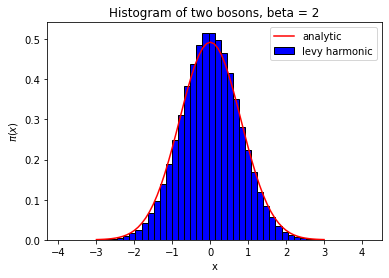

In [2]:
import math, random, pylab

def levy_harmonic_path(k):
    x = [random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0)))]
    if k == 2:
        Ups1 = 2.0 / math.tanh(beta)
        Ups2 = 2.0 * x[0] / math.sinh(beta)
        x.append(random.gauss(Ups2 / Ups1, 1.0 / math.sqrt(Ups1)))
    return x[:]

def rho_harm_1d(x, xp, beta):
    Upsilon_1 = (x + xp) ** 2 / 4.0 * math.tanh(beta / 2.0)
    Upsilon_2 = (x - xp) ** 2 / 4.0 / math.tanh(beta / 2.0)
    return math.exp(- Upsilon_1 - Upsilon_2)

def z(beta):
    return 1.0 / (1.0 - math.exp(- beta))

def pi_two_bosons(x, beta):
    pi_x_1 = math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) *\
             math.exp(-x ** 2 * math.tanh(beta / 2.0))
    pi_x_2 = math.sqrt(math.tanh(beta)) / math.sqrt(math.pi) *\
             math.exp(-x ** 2 * math.tanh(beta))
    weight_1 = z(beta) ** 2 / (z(beta) ** 2 + z(2.0 * beta))
    weight_2 = z(2.0 * beta) / (z(beta) ** 2 + z(2.0 * beta))
    pi_x = pi_x_1 * weight_1 + pi_x_2 * weight_2
    return pi_x

beta = 2.0
nsteps = 500000
low = levy_harmonic_path(2)
high = low[:]
data = []

for step in range(nsteps):
    # move 1
    if low[0] == high[0]:
        k = random.choice([0, 1])
        low[k] = levy_harmonic_path(1)[0]
        high[k] = low[k]
    else:
        low[0], low[1] = levy_harmonic_path(2)
        high[1] = low[0]
        high[0] = low[1]
    data += low[:]
    # move 2
    weight_old = (rho_harm_1d(low[0], high[0], beta) *
                  rho_harm_1d(low[1], high[1], beta))
    weight_new = (rho_harm_1d(low[0], high[1], beta) *
                  rho_harm_1d(low[1], high[0], beta))
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        high[0], high[1] = high[1], high[0]
    
        
list_x = [0.1 * a for a in range (-30, 31)]
list_y = [pi_x(x, beta) for x in list_x]
pylab.plot(list_x, list_y, label='analytic', color = 'red')
pylab.hist(data, bins=50, density = True, stacked = True,\
           ec='black', label='levy harmonic', color = 'blue')
pylab.legend()
pylab.title('Histogram of two bosons, beta = 2')
pylab.xlabel('x')
pylab.ylabel('$\pi(x)$')
#pylab.savefig()
pylab.show()        

**A2 (continued)**

**Question:** The exact expression  of pi_two_bosons(x, beta) is a sum of two terms (pi_x_1 and pi_x_2),  weighted by weight_1 and weight_2. Explain this expression: what is  z(beta)? How does it enter in the two weights? What are pi_x_1 and  pi_x_2?

**Answer** Given: pi_two_bosons(x, beta) = weight_1 x pi_x_1 + weight_2 x pi_x_2 

Here, $z(\beta)$ is the BE distribution function, pi_x_1 and  pi_x_2 are the probability of finding the particle in the state 1 and sate 2 respectively.

The probability of finding the two bosons at state 1 and state 2 respectively is given by,

weight_1 x pi_x_1 + weight_2 x pi_x_2 
such that, wieght_1 + weight_2 = 1


**A2 (continued)**

**Modify this program so that it allows you to:**

1. record the respective probabilities of the two permutations and

2. sweep through temperatures.

This new program should **run a simulation for each beta in a list** (take a list of values of beta going **from beta=0.1 to about beta=5.0**).  For each simulation, it should record the fraction (prob_one_cycle) of  configurations in which both bosons are on the same cycle, and the  corresponding fraction (prob_two_cycles) of configurations in which each  boson forms a single cycle. These two numbers should sum up to one  (prob_one_cycle+prob_two_cycle=1).

In [3]:
import math, random, pylab

def levy_harmonic_path(k):
    x = [random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0)))]
    if k == 2:
        Ups1 = 2.0 / math.tanh(beta)
        Ups2 = 2.0 * x[0] / math.sinh(beta)
        x.append(random.gauss(Ups2 / Ups1, 1.0 / math.sqrt(Ups1)))
    return x[:]

def rho_harm_1d(x, xp, beta):
    Upsilon_1 = (x + xp) ** 2 / 4.0 * math.tanh(beta / 2.0)
    Upsilon_2 = (x - xp) ** 2 / 4.0 / math.tanh(beta / 2.0)
    return math.exp(- Upsilon_1 - Upsilon_2)

def z(beta):
    return 1.0 / (1.0 - math.exp(- beta))

def pi_two_bosons(x, beta):
    pi_x_1 = math.sqrt(math.tanh(beta / 2.0)) / math.sqrt(math.pi) *\
             math.exp(-x ** 2 * math.tanh(beta / 2.0))
    pi_x_2 = math.sqrt(math.tanh(beta)) / math.sqrt(math.pi) *\
             math.exp(-x ** 2 * math.tanh(beta))
    weight_1 = z(beta) ** 2 / (z(beta) ** 2 + z(2.0 * beta))
    weight_2 = z(2.0 * beta) / (z(beta) ** 2 + z(2.0 * beta))
    pi_x = pi_x_1 * weight_1 + pi_x_2 * weight_2
    return pi_x

beta = 2.0
nsteps = 1000
low = levy_harmonic_path(2)
high = low[:]
data = []

for step in range(nsteps):
    # move 1
    if low[0] == high[0]:
        k = random.choice([0, 1])
        low[k] = levy_harmonic_path(1)[0]
        high[k] = low[k]
    else:
        low[0], low[1] = levy_harmonic_path(2)
        high[1] = low[0]
        high[0] = low[1]
    data += low[:]
    # move 2
    weight_old = (rho_harm_1d(low[0], high[0], beta) *
                  rho_harm_1d(low[1], high[1], beta))
    weight_new = (rho_harm_1d(low[0], high[1], beta) *
                  rho_harm_1d(low[1], high[0], beta))
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        high[0], high[1] = high[1], high[0]

In the end, **plot prob_one_cycle and prob_two_cycles as two curves in function of beta**, and **compare to the analytic solution**,  shown in the following snippet. **Upload this figure**. (NB: a small number  of iterations (e.g. nsteps=1000) should already provide reasonably good  agreement, but feel free to increase it to have more precise results).

Text(0.5, 1.0, 'plot prob_one_cycle and prob_two_cycles')

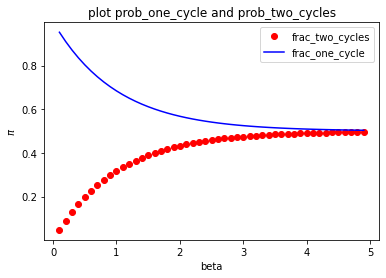

In [4]:
def z(beta):
    return 1.0 / (1.0 - math.exp(-beta))

list_beta = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0 ]
list_beta = [0.1*a for a in range(1,50, 1) ]

fract_two_cycles = [z(beta) ** 2 / (z(beta) ** 2 + z(2.0 * beta)) for beta in list_beta]
fract_one_cycle = [z(2.0 * beta) / (z(beta) ** 2 + z(2.0 * beta)) for beta in list_beta]
pylab.plot(list_beta, fract_one_cycle, 'o', color = 'red', label = 'frac_two_cycles')
pylab.plot(list_beta, fract_two_cycles, '-', color = 'blue', label = 'frac_one_cycle')
pylab.xlabel('beta')
pylab.ylabel('$\pi$')
pylab.legend()
#pylab.savefig('')
pylab.title('plot prob_one_cycle and prob_two_cycles')

**A3**

Consider **two Bosonic quantum particles** in a one-dimensional harmonic trap  (particles do not interact with each other), exactly as in Section **A2**. Write a simple program  sampling their positions from levy_harmonic_path(k)), but **use dictionaries**, **rather than lists**. Python **dictionaries** are a great invention. In other languages, they are called **hash tables. For your convenience, the program is shown below.**  The dictionary is called "x". It has "keys", the positions at tau =0,  and "values", the positions at tau = beta. For a given key "a", the  corresponding value can be accessed through x[a]. To remove the key "a"  and the corresponding value from the dictionary, we use x.pop(a).

NB:  this program is **equivalent to the A2 program**, but much more convenient later, when you will treat many particles. In using this program you will discover the effect of **boson bunching**, a genuine quantum indistinguishability effect that exists even for two particles, and even at high temperature.

- Modify this program so that it collects **samples of the absolute distance r between the two bosons,** i.e.,  store all the values of r=abs(x.keys()[1] - x.keys()[0]). **NB**: x.keys() is a list with two entries (x.keys()[0] and x.keys()[1]), which are the positions of the two bosons at the slice 0. Therefore r is the distance between the two bosons.


In [7]:
import math, random, pylab

def levy_harmonic_path(k):
    x = [random.gauss(0.0, 1.0 / math.sqrt(2.0 * math.tanh(k * beta / 2.0)))]
    if k == 2:
        Ups1 = 2.0 / math.tanh(beta)
        Ups2 = 2.0 * x[0] / math.sinh(beta)
        x.append(random.gauss(Ups2 / Ups1, 1.0 / math.sqrt(Ups1)))
    return x[:]

def rho_harm_1d(x, xp, beta):
    Upsilon_1 = (x + xp) ** 2 / 4.0 * math.tanh(beta / 2.0)
    Upsilon_2 = (x - xp) ** 2 / 4.0 / math.tanh(beta / 2.0)
    return math.exp(- Upsilon_1 - Upsilon_2)

beta = 0.1
nsteps = 1000000
low_1, low_2 = levy_harmonic_path(2)
x = {low_1:low_1, low_2:low_2}
r = [] #distance between the two bosons
data = []
for step in range(nsteps):
    # move 1
    a = random.choice(list(x.keys()))
    if a == x[a]:
        dummy = x.pop(a)
        a_new = levy_harmonic_path(1)[0]
        x[a_new] = a_new
    else:
        a_new, b_new = levy_harmonic_path(2)
        x = {a_new:b_new, b_new:a_new}
    r1=abs(list(x)[1] - list(x)[0])
    r.append(r1)

    # move 2
    (low1, high1), (low2, high2) = x.items()
    weight_old = rho_harm_1d(low1, high1, beta) * rho_harm_1d(low2, high2, beta)
    weight_new = rho_harm_1d(low1, high2, beta) * rho_harm_1d(low2, high1, beta)
    if random.uniform(0.0, 1.0) < weight_new / weight_old:
        x = {low1:high2, low2:high1}
    

- Modify the program further, and produce a **histogram (use nbins=120) of the absolute distance r at high temperature (use beta=0.1).** On the same graph,  compare it with the analytic expression for distinguishable particles obtained through the following snippet:

**def prob_r_distinguishable(r, beta): <br>
    sigma = math.sqrt(2.0) / math.sqrt(2.0 * math.tanh(beta / 2.0))<br>
    prob = (math.sqrt(2.0 / math.pi) / sigma) * math.exp(- r ** 2 / 2.0 / sigma ** 2)<br>
    return prob**<br>

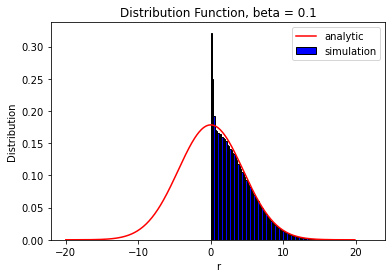

In [11]:
def prob_r_distinguishable(r, beta):
    sigma = math.sqrt(2.0) / math.sqrt(2.0 * math.tanh(beta / 2.0))
    prob = (math.sqrt(2.0 / math.pi) / sigma) * math.exp(- r ** 2 / 2.0 / sigma ** 2)
    return prob
beta =0.1
list_x = [0.1 * a for a in range (-200,200)]
list_y = [prob_r_distinguishable(x, beta) for x in list_x]
pylab.plot(list_x, list_y, label='analytic', color = 'red')
pylab.hist(r, 120, density = True, stacked = True,\
           ec='black', label='simulation', color = 'blue')
pylab.xlabel('r')
pylab.ylabel('Distribution')
pylab.title('Distribution Function, beta = 0.1')
pylab.legend()
#pylab.savefig('')
pylab.show()

**A3 (continued)**

- **Comment:**  Do you find differences between  the pair distribution for  distinguishable particles  and the pair distribution for bosons, even at  high temperature?

**NB**: In case you find differences, **you discovered boson bunching**.  Bunching has a simple explanation in terms of permutation, that you can  find on your own (Hint: || + X = 2 II...). Bunching is an experimental  phenomenon familiar in photons (which are also Bosons), cold atoms, and  many other systems. Amazingly, it is most pronounced at high  temperature.